In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 20:17:53 2020

@author: robert_normand
"""

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Download Data from Yahoo Finance
import datetime
import matplotlib.pyplot as plt
import pandas as pd
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 

start_sp = datetime.datetime(2018,3,31)
end_sp = datetime.datetime(2020, 12,31)

# Use Vanguard ETF
# SP500 Index + 11 Industry

BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IVW']


#BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IWD','ITOT','IVW','IWB','IWR','DVY',
#           'IVE','IWP','IWS','IWV','IUSG','IWO','IWN','IBB','IJK','IUSV',
#           'OEF','IJS','IJJ','IYW','IHI','IJT','ITA','IGV','IYH','SOXX','EWC',
#           'IGM','IYF','JKE','SUSA','IDU','IYY','IYG','JKD','IYC','IYJ','JKG',
#           'IWC','IYK','JKF','JKH','IYT','JKI','IYZ','IGE','IYE','JKL','IYM',
#           'JKJ','JKK','IGN']

Data = yf.download(BLack_ETF, start=start_sp, end=end_sp,group_by="ticker")

# To access data for SP500
SP500_dat=Data['IVW']

# To access the adjusted close price, use
Data['IVW']['Adj Close']

# Graph data
Data['IVW']['Adj Close'].plot(grid=True)

# To get Information about a ticker
SP500_detail = yf.Ticker("IVW")

# Show stock info
#SP500_detail.info


[*********************100%***********************]  6 of 6 completed


In [2]:
#SP500_dat

In [3]:
#les rendements quotidiens
from pandas_datareader import data, wb
df = pd.DataFrame([data.DataReader(etf, 'yahoo', start_sp, end_sp)['Adj Close'] for etf in BLack_ETF]).T
df.columns = BLack_ETF
rendement = df.pct_change()
#rendement

In [4]:
# Mettre le rendement en 0 = descente 1= montée
j=1
for ticker in BLack_ETF:
    for j in range(len(rendement)):
        if rendement[ticker][j]<0:
            rendement[ticker][j]=0
        else:
            rendement[ticker][j]=1
rendement_bin=rendement
#rendement_bin

# Pour chacun des ETF, vous fournissez les statistiques de base

a.	Rendement moyen, volatilité, quantile, etc.

In [5]:
list_etf = []
for etf in BLack_ETF:
    list_etf.append(df[etf].describe())

b.	L’analyse peut être présentée sous forme de tableaux et graphiques 

In [6]:
#list_etf

In [7]:
df_describe = pd.DataFrame(list_etf)

In [8]:
#df_describe

2.	Par la suite, vous validez la performance des 5 indicateurs techniques appliqués sur chaque ETF

a.	Vous calculez la performance du signal

In [9]:
from Data_TP2_V2 import BBANDS, STOK, MACD, RSI, MFI

###### BollingerBands, Oscilateur stochastique, MACD, RSI, Money Flow

#### 1- Indicateurs

In [10]:
result_BB = pd.DataFrame()
result_STOK = pd.DataFrame()
result_MACD = pd.DataFrame()
result_RSI = pd.DataFrame()
result_MFI = pd.DataFrame()

for ticker in BLack_ETF:
    daf = BBANDS(Data[ticker],"Close",21,2)
    result_BB[ticker+'_HIGH'] = daf.iloc[:,-1]
    result_BB[ticker+'_LOW'] = daf.iloc[:,-2]
    
    daf = STOK(Data[ticker])
    result_STOK[ticker] = daf.iloc[:,-1]
    
    daf = MACD(Data[ticker],"Adj Close",5,25,9)
    result_MACD[ticker] = df.iloc[:,-1]
    result_MACD[ticker+'_SIGN'] = daf.iloc[:,-2]
    result_MACD[ticker+'_DIFF'] = daf.iloc[:,-3]
    
    daf = RSI(Data[ticker],14)
    result_RSI[ticker] = daf.iloc[:,-1]
    
    daf = MFI(Data[ticker],14)
    result_MFI[ticker] = daf.iloc[:,-1]
    

In [11]:
#result_MACD

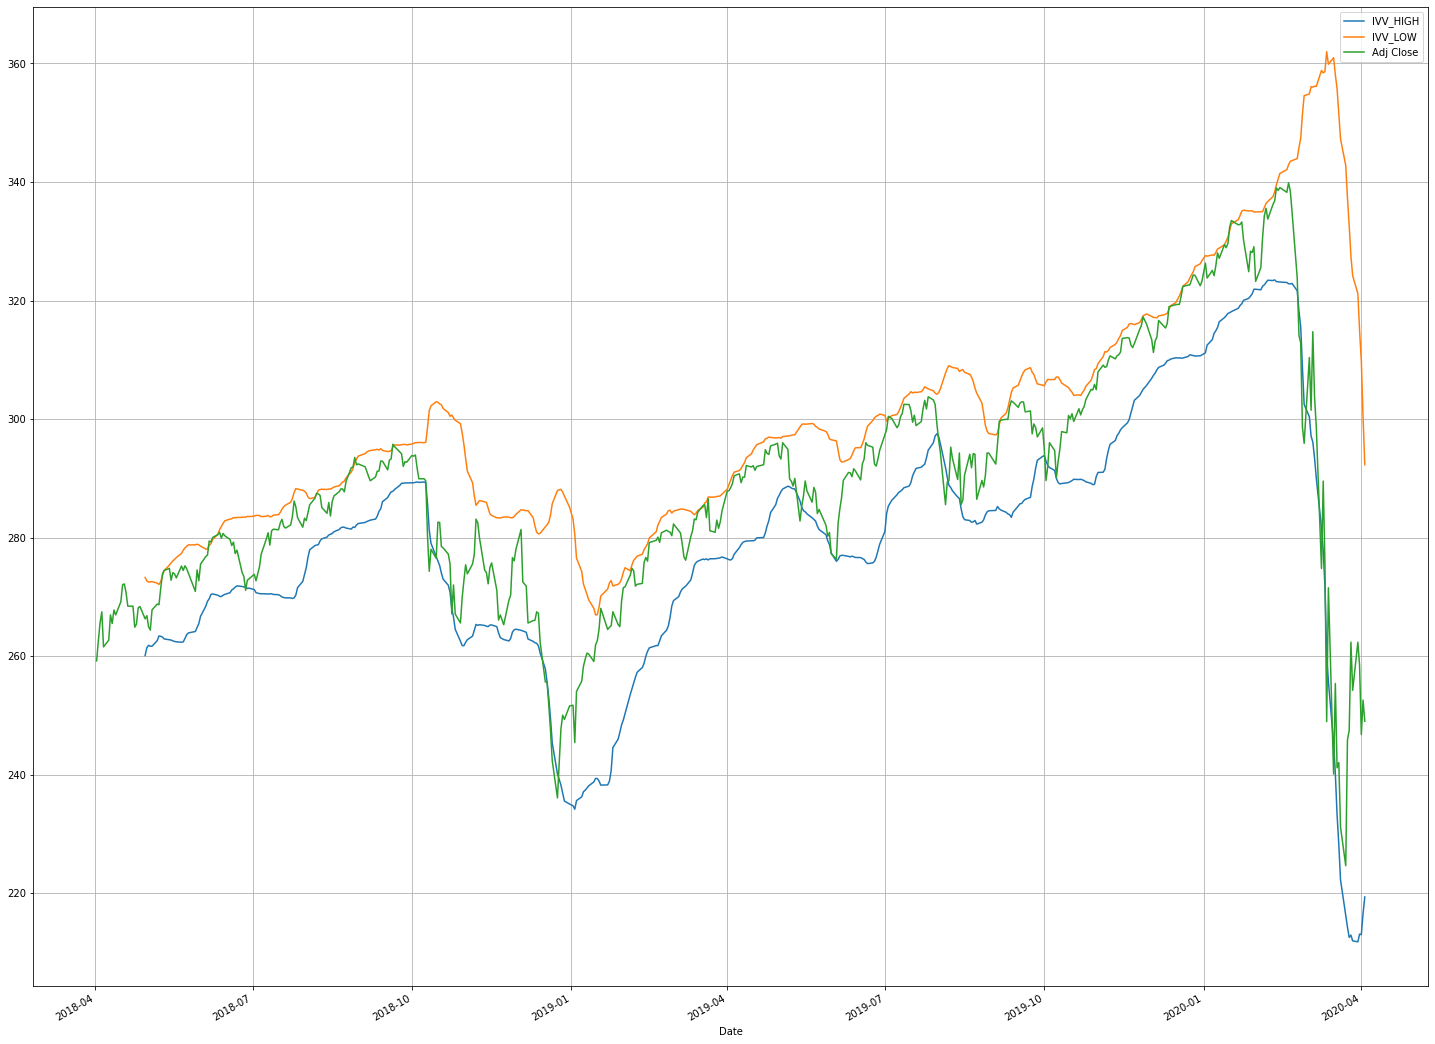

In [12]:
#Exemple de graphique
df = pd.DataFrame()
mycolumn=['IVV_HIGH','IVV_LOW']
df[mycolumn]= result_BB[mycolumn]
df['Adj Close'] = Data['IVV']['Close']
df.plot(grid=True, figsize = (25,20))

### 2 - Signal

#### Bollinger Bands

Pour Bollinger Bands si close price est supérieure à +2SD -> Long
                     ; si close price est inférieure à -2SD -> Short
                     ; sinon Neutral

In [13]:
Signal_BBAND = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        haut_BB = result_BB[ticker+'_HIGH'][i]
        bas_BB = result_BB[ticker+'_LOW'][i]
        haut_stock = Data[ticker]['High'][i]
        bas_stock = Data[ticker]['Low'][i]
        if haut_stock > haut_BB:
            Sig = 1
        elif bas_stock < bas_BB:
            Sig = -1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_BBAND', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_BBAND')]))
    S2D[ticker] = S
    Signal_BBAND = Signal_BBAND.join(S2D)

#### Oscillateur stochastique

Pour Oscillateur stochastique si Stok =< 20 -> Long
                              ;si Stok >= 80 -> Short
                              ;sinon Neutral

In [14]:
Signal_STOK = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        stok = result_STOK[ticker][i]
        if stok <= 0.20:
            Sig = 1
        elif stok >= 0.80:
            Sig = -1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_STOK', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_STOK')]))
    S2D[ticker] = S
    Signal_STOK = Signal_STOK.join(S2D)

#### MACD

Pour MACD si MACDdiff > 0 -> Long
          ;si MACDdiff < 0 -> Short
          ;si MACDdiff = 0 -> Neutral

In [15]:
Signal_MACD = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1:
        MACD = result_MACD[ticker+'_DIFF'][i] 
        if MACD > 0:
            Sig = 1
        elif MACD == 0:
            Sig = 0
        else:
            Sig = -1
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_MACD', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_MACD')]))
    S2D[ticker] = S
    Signal_MACD = Signal_MACD.join(S2D)

#### RSI

Pour RSI si RSI =< 30 -> Long 
         ;si RSI >= 70 -> Short
         ;sinon neutral

In [16]:
Signal_RSI = Data
for ticker in BLack_ETF:   
    df = RSI(Data[ticker],14)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] >= 70:
            Sig = -1
        elif df.iloc[i,-1] <= 30:
            Sig = 1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_RSI', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_RSI')]))
    S2D[ticker] = S
    Signal_RSI = Signal_RSI.join(S2D)

#### Money Flow Index

Pour Money Flow ;si MFI < 30 -> Long
                :si MFI > 70 -> Short
                :sinon neutral

In [17]:
Signal_MFI = Data
for ticker in BLack_ETF:   
    df = MFI(Data[ticker],14)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] >= 70:
            Sig = -1
        elif df.iloc[i,-1] <= 30:
            Sig = 1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_MFI', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_MFI')]))
    S2D[ticker] = S
    Signal_MFI = Signal_MFI.join(S2D)

In [18]:
# Mettre ensemble tous les tableaux
debut = len(BLack_ETF)*6
fin = debut + len(BLack_ETF)
Signal_5indicateurs = Signal_BBAND.iloc[:,debut:fin]
Signal_5indicateurs = Signal_5indicateurs.join(Signal_MACD.iloc[:,debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_RSI.iloc[:, debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_MFI.iloc[:, debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_STOK.iloc[:, debut:fin])

Performance

In [19]:
import numpy as np
NbrJour = 1
rendement=0
rendement_ETF=0
rendement_tot = []
rendement_signal = pd.DataFrame()
sig = ['Signal_MFI','Signal_RSI','Signal_BBAND','Signal_STOK','Signal_MACD']
for signal in sig:  
    for ticker in BLack_ETF:
        for i in range(len(Data)-1):
            Signal = Signal_5indicateurs[ticker][signal][i]
            ouverture = Data[ticker]['Open'][i+1]
            fermeture = Data[ticker]['Close'][i+1]
            if Signal==1:
                rendement = (-ouverture + fermeture)/ouverture*100
            elif Signal==-1:
                rendement = (ouverture - fermeture)/fermeture*100
            rendement_ETF += rendement
            rendement=0
        rendement_tot.append(rendement_ETF)
        rendement_ETF=0
    rendement_signal[signal+'_%'] = np.transpose(rendement_tot)
    rendement_tot=[]

In [20]:
rendement_signal.index=BLack_ETF
rendement_signal
rendement_signal_moy = rendement_signal.mean()
rendement_signal_moy

Signal_MFI_%       4.266807
Signal_RSI_%       4.073342
Signal_BBAND_%    -7.804078
Signal_STOK_%      6.460099
Signal_MACD_%     11.363275
dtype: float64

b.	Vous fournissez les statistiques sur la performance de la classification

In [21]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_curve

1) Generic Accuracy

In [22]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy = []
confusion =[]
precision = pd.DataFrame()
for signal in sig:  
    for ticker in BLack_ETF:
        y_true = rendement_bin[ticker]
        y_pred = Signal_5indicateurs[ticker][signal]
        precision = pd.DataFrame(y_true,y_pred)
        print(precision)
        precision[(precision!=0).all(1)]
        print(precision)
        accuracy.append(accuracy_score(y_true, y_pred))
        confusion.append(confusion_matrix(y_true, y_pred))

            IVV
Signal_MFI     
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 1          NaN
 0          NaN
 0          NaN
 0          NaN
...         ...
 0          NaN
 0          NaN
 0          NaN
 1          NaN
 1          NaN
 1          NaN
 1          NaN
 1          NaN
 1          NaN
 1          NaN
 1          NaN
 1          NaN
 1          NaN
 1          NaN
 0          NaN
 1          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0      

             IWF
Signal_STOK     
 0           NaN
-1           NaN
-1           NaN
 0           NaN
 0           NaN
 1           NaN
 0           NaN
 1           NaN
 0           NaN
 0           NaN
 0           NaN
 0           NaN
 0           NaN
 0           NaN
 0           NaN
 0           NaN
 0           NaN
 0           NaN
 0           NaN
 0           NaN
 1           NaN
-1           NaN
 1           NaN
-1           NaN
-1           NaN
 0           NaN
 0           NaN
-1           NaN
-1           NaN
 0           NaN
...          ...
 0           NaN
 1           NaN
 0           NaN
 1           NaN
-1           NaN
-1           NaN
 1           NaN
-1           NaN
 0           NaN
-1           NaN
 0           NaN
-1           NaN
 0           NaN
 0           NaN
-1           NaN
 0           NaN
-1           NaN
-1           NaN
 0           NaN
 1           NaN
 0           NaN
-1           NaN
 0           NaN
-1           NaN
 0           NaN
-1           N

2) Matrice de confusion

In [23]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#mat = confusion_matrix(y_true, y_pred)
#mat

3) ROC Curve

In [24]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
fpr, tpr, _ = roc_curve(y_true, y_pred)
allo = auc(fpr, tpr)

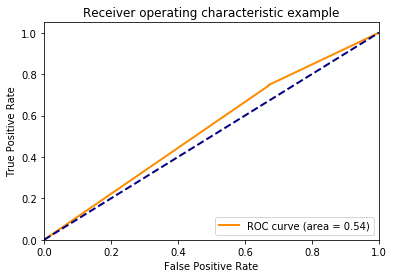

In [25]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % allo)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()